In [1]:
import numpy as np

# Import classes
from idtxl.bivariate_mi import BivariateMI
from idtxl.data import Data
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Adding data with properties: 2 processes, 1000 samples, 1 replications
overwriting existing data

---------------------------- (1) include source candidates


---------------------------- (2) prune cadidates

---------------------------- (3) final statistics

---------------------------- (1) include source candidates


---------------------------- (2) prune cadidates
selected vars sources [(0, 4)]
selected candidates current source: [(0, 1)]

---------------------------- (3) final statistics
For var 0 sources [1] mi None p None
For var 1 sources [0] mi [0.82468736] p [0.002]
	0 -> 1, max_te_lag: 1


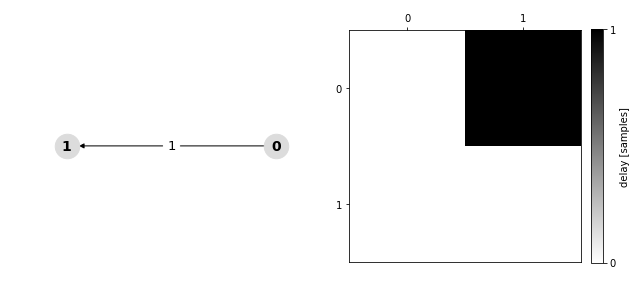

In [66]:
def cycle(data, n):
    if n == 0:
        return data
    else:
        return np.hstack((data[n:], data[:n]))

# TEST 1: Random data
NDATA = 1000

dataNP = np.zeros((2, NDATA))
dataNP[0,:] = np.random.normal(0, 1, NDATA)
dataNP[1,:] = cycle(2*np.copy(dataNP[0,:]) + np.random.normal(0, 1, NDATA), -1)
data = Data(dataNP, dim_order='ps')

# b) Initialise analysis object and define settings
network_analysis = BivariateMI()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 5,
            'min_lag_sources': 0,
           'verbose' : False}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=data)
for i in range(2):
    rezThis = results.get_single_target(i, fdr=False)
    print("For var", i, "sources", rezThis['sources_tested'], 'mi', rezThis['mi'], 'p', rezThis['selected_sources_pval'])

# print(results.get_single_target(0, fdr=False))
# print(results.settings)
# print(results.data_properties)

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()

{'sources_tested': [1], 'current_value': (0, 5), 'selected_vars_sources': [(1, 1)], 'selected_vars_target': [], 'selected_sources_pval': array([0.002]), 'selected_sources_mi': array([0.83001421]), 'omnibus_mi': 0.8300142064797621, 'omnibus_pval': 0.002, 'omnibus_sign': True, 'mi': array([0.83001421])}
{'cmi_estimator': 'JidtGaussianCMI', 'max_lag_sources': 5, 'min_lag_sources': 0, 'verbose': False, 'fdr_correction': True, 'add_conditionals': None, 'tau_sources': 1, 'local_values': False, 'debug': False, 'n_perm_max_stat': 200, 'alpha_max_stat': 0.05, 'permute_in_time': True, 'perm_type': 'random', 'analytical_surrogates': True, 'n_perm_omnibus': 500, 'alpha_omnibus': 0.05, 'n_perm_max_seq': 500, 'alpha_max_seq': 0.05, 'alpha_fdr': 0.05, 'fdr_correct_by_target': True, 'fdr_constant': 2}
{'n_nodes': 2, 'n_realisations': 995, 'normalised': True}
